In [16]:
# make sure packages are installed
import subprocess
def install_package(package_name):
    subprocess.check_call(["pip", "install", package_name])

install_package("numpy")
install_package("pandas")
install_package("matplotlib")
install_package("ipympl")
install_package("ipywidgets")
install_package("mplcursors")

In [17]:
# %matplotlib widget

import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mplp
import matplotlib.colors as mplc
# import ipywidgets as widgets
# import mplcursors as mplc

filepath_inputs   = "Dataset/inputs/inputs/"
filepath_snapshots = "Dataset/snapshots/"
filename_overview = "Dataset/aoe_data.csv"
filename_snapshot = filepath_snapshots + "snapshots_arabia_t_5040.csv"

In [18]:
data        = pd.read_csv(filename_snapshot)
print("Loaded data")

overview    = pd.read_csv(filename_overview)
print("Loaded overview", )

Loaded data
Loaded overview


In [32]:
# Building usage analysis

parameters = [
    "House",
    "Mill",
    "Lumber Camp",
    "Mining Camp",
    "Farm",
    "Town Center",
    "Barracks",
    "Stable",
    "Archery Range",
    "Siege Workshop",
    "Castle",
    
    "Villager",
    "Militia",
    "Spearman",
    "Eagle Scout",
    "Skirmisher",
    "Archer",
    "Scout Cavalry",
    "Knight"
]

count = len(parameters)

print(data.shape)

# Data
requirements = (data["duration"] > 600)
# requirements &= (data["p1_civ"] != "Franks") & (data["p2_civ"] != "Franks")
filtered = data.loc[requirements]

wins = [np.concatenate([
    filtered.loc[filtered["winner"] == 0]["p1_" + p], 
    filtered.loc[filtered["winner"] == 1]["p2_" + p]]) 
    for p in parameters]

combined = [np.concatenate([filtered["p1_" + p], filtered["p2_" + p]]) for p in parameters]

# Results
means = [np.mean(sums) for sums in combined]
stds = [np.std(sums) for sums in combined]

wins_std = [(np.mean(wins[i]) - np.mean(combined[i])) / np.std(combined[i]) for i in range(count)]

for i in range(count):
    print(f"{parameters[i] : <17}{round(wins_std[i], 5) : <7}")


(138902, 680)


KeyboardInterrupt: 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12808\13068075.py:66: RuntimeWarning: invalid value encountered in scalar divide
  wins_std = [(np.mean(wins_diff[i]) - np.mean(combined_diff[i])) / np.std(combined_diff[i]) for i in range(count)]


House              0.01747   0.0391  0.06789  0.13151  0.02871 -0.01325 -0.03064 
Lumber Camp       -0.00054 -0.03055  0.02567   0.1051  0.08452  0.07663  0.06388 
Mining Camp         0.0199 -0.01034  0.04677   0.1676  0.14663  0.11624  0.13282 
Farm              -0.02107   0.1328  0.09192  0.08798  0.02945  0.00327 -0.02835 
Town Center        0.00754  0.02519  0.11506  -0.0138 -0.03157 -0.06242 -0.06829 
Barracks            0.0827 -0.06179 -0.01556  0.02523 -0.00273 -0.02414 -0.01731 
Stable              0.0575  0.06657   0.0429  0.08822  0.05115  0.01044  0.00527 
Archery Range      0.02463  0.00471 -0.02104  0.03482    2e-05 -0.04097  -0.0514 
Siege Workshop         nan  0.02141  0.06176  0.03665  0.01721  0.01161    0.044 
Castle                 nan  0.01392  0.02262  0.09098  0.07125  0.05385  0.07268 
Villager           0.02001  0.07958  0.16517   0.1023 -0.01595 -0.06931 -0.08284 
Militia             0.0587 -0.01254   0.0075  0.01247   0.0186  0.00679   0.0174 
Spearman        

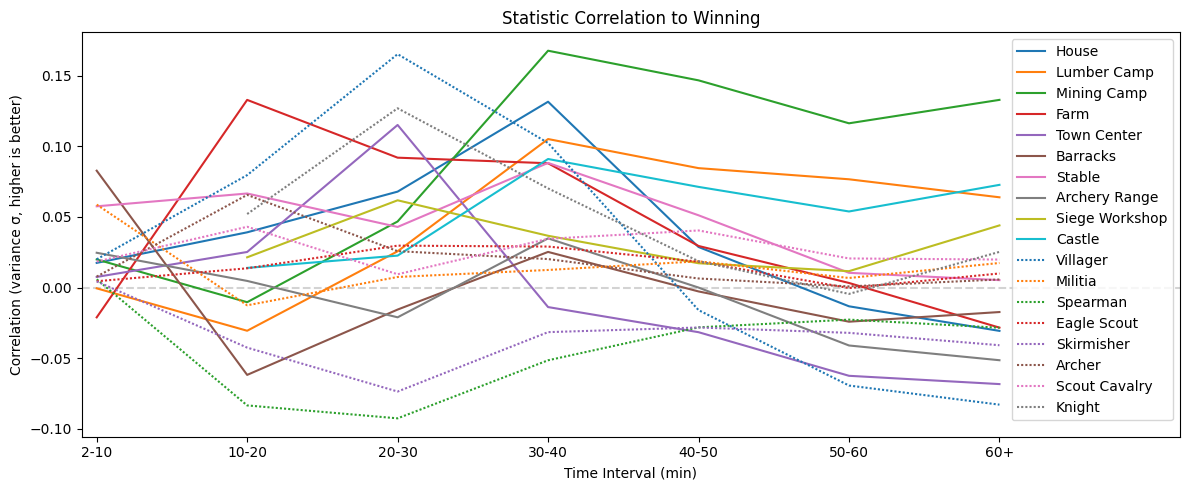

In [31]:
# Building usage analysis

parameters = [
    "House",
    # "Mill",
    "Lumber Camp",
    "Mining Camp",
    "Farm",
    "Town Center",
    "Barracks",
    "Stable",
    "Archery Range",
    "Siege Workshop",
    "Castle",
    
    "Villager",
    "Militia",
    "Spearman",
    "Eagle Scout",
    "Skirmisher",
    "Archer",
    "Scout Cavalry",
    "Knight"
]

count = len(parameters)

results = []

start = 0
interval = 600
iterations = 7

data_low = pd.read_csv(filepath_snapshots + f"snapshots_arabia_t_{start if start > 0 else 120}.csv")

for i in range(iterations):
    high = start + interval * (i + 1)
    if i == iterations - 1:
        high = 5040
    data_high = pd.read_csv(filepath_snapshots + f"snapshots_arabia_t_{high}.csv")
    
    # Filter to only games long enough
    filter = high
    if i == iterations - 1:
        filter = start + interval * i
    data_high = data_high.loc[data_high["duration"] >= filter]
    data_low = data_low.loc[data_low["duration"] >= filter]
    
    # Filter to winning statistics
    wins_high = [np.concatenate([
        data_high.loc[data_high["winner"] == 0]["p1_" + p], 
        data_high.loc[data_high["winner"] == 1]["p2_" + p]]) 
                 for p in parameters]
    
    wins_low = [np.concatenate([
        data_low.loc[data_low["winner"] == 0]["p1_" + p], 
        data_low.loc[data_low["winner"] == 1]["p2_" + p]]) 
                for p in parameters]
    
    combined_high = [np.concatenate([data_high["p1_" + p], data_high["p2_" + p]]) for p in parameters]
    combined_low = [np.concatenate([data_low["p1_" + p], data_low["p2_" + p]]) for p in parameters]
    
    wins_diff = np.subtract(wins_high, wins_low)
    combined_diff = np.subtract(combined_high, combined_low)
    
    wins_std = [(np.mean(wins_diff[i]) - np.mean(combined_diff[i])) / np.std(combined_diff[i]) for i in range(count)]
    
    results.append(wins_std)
    
    data_low = data_high


# Print results

for i in range(count):
    print(f"{parameters[i] : <17}", end=" ")
    for j in range(iterations):
        print(f"{round(results[j][i], 5) : >8}", end=" ")
    print()


# Plot graph

plt.figure(figsize=(12, 5))
plt.title("Statistic Correlation to Winning")
plt.xlabel("Time Interval (min)")
plt.ylabel("Correlation (variance \u03c3, higher is better)")
plt.xlim(left = -0.1, right = (iterations - 1) * 1.2)

x_values = np.arange(iterations)
x_ticks = [f"{max(i * interval // 60, 2)}-{(i + 1) * interval // 60}" for i in range(iterations - 1)]
x_ticks.append(f"{(iterations - 1) * interval // 60}+")
plt.xticks(x_values, x_ticks)

plt.axhline(0, color="lightgrey", ls="--")

result_array = np.array(results)
unit_index = parameters.index("Villager")
color_map = mpl.colormaps.get_cmap('tab10')
color_step = 0.10
for i in range(count):
    color = color_map((i - (0 if i < unit_index else unit_index)) * color_step)
    plt.plot(x_values, result_array[:, i], 
             color=color, ls="-" if i < unit_index else (0, (1, 1)), label=parameters[i])

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

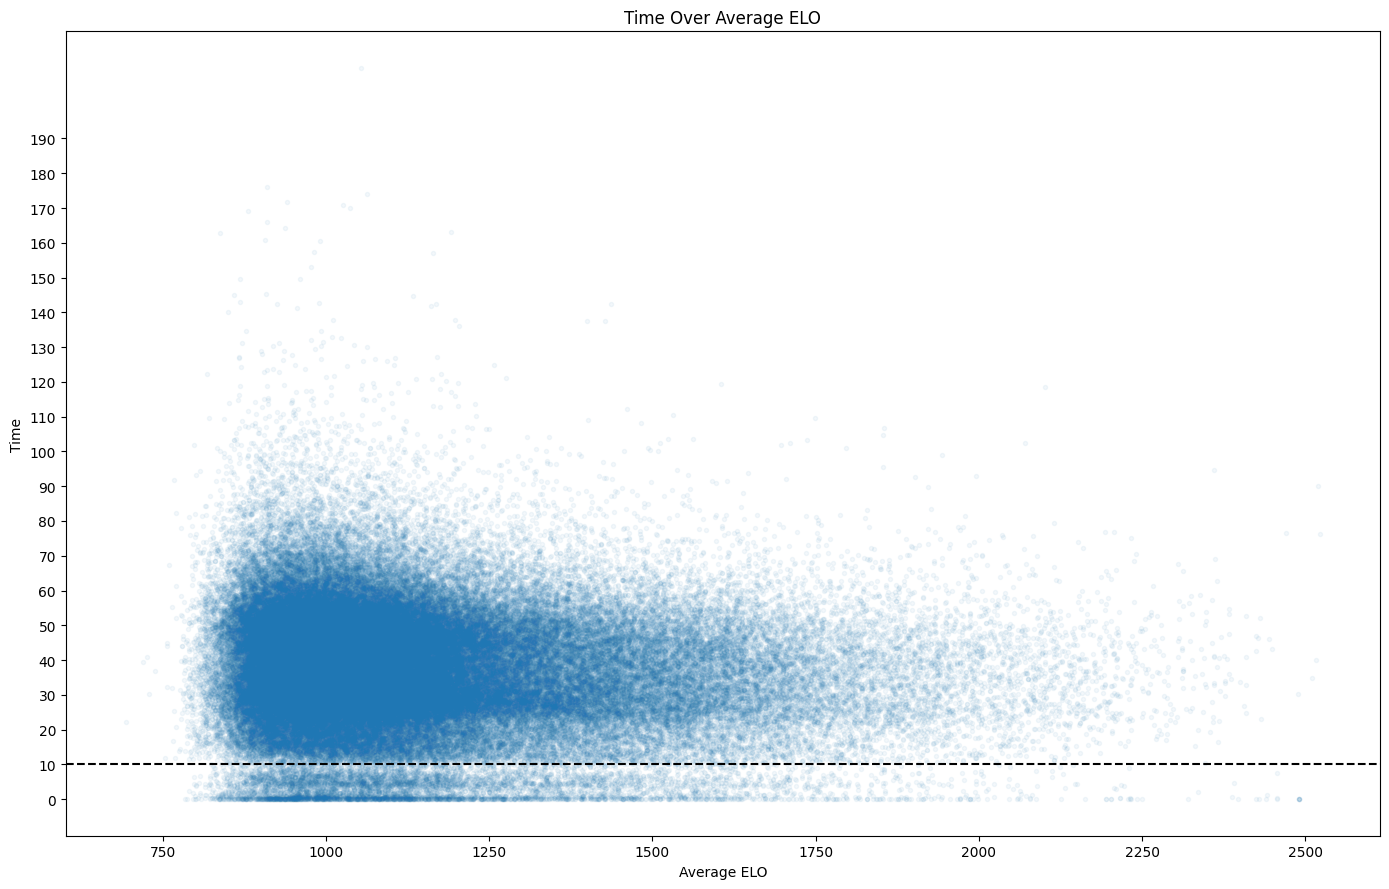

In [21]:
# Player ELO game duration correlation

plt.figure(figsize=(14, 9))
plt.title("Time Over Average ELO")
plt.xlabel("Average ELO")
plt.ylabel("Time")

plt.axhline(60 * 10, color="black", ls="--")
# plt.axhline(60 * 20, color="black", ls="--")

data_x = data["avg_elo"]
data_y = data["duration"]
data_order = np.argsort(data_x)
plt.scatter(data_x[data_order], data_y[data_order], marker='.', alpha=0.05)

plt.yticks(ticks=np.arange(0, 20) * (60 * 10), labels=np.arange(0, 20) * 10)

plt.tight_layout()

plt.show()

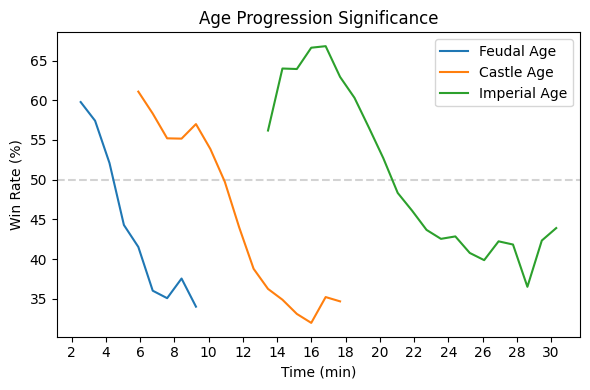

In [30]:
# Age progression significance

data_win = data["winner"]
data_times = [
    [
        data["p1 Feudal Age Time"],
        data["p1 Castle Age Time"],
        data["p1 Imperial Age Time"]
    ],
    [
        data["p2 Feudal Age Time"],
        data["p2 Castle Age Time"],
        data["p2 Imperial Age Time"]
    ]
]

data_x = np.linspace(0, 5000, 100)

wins    = np.zeros((3, 100))
losses  = np.zeros((3, 100))

for i, winner in enumerate(data_win):
    for j in range(0, 2):
        t = data_times[j]
        for k, age in enumerate(t):
            time = age[i]
            bucket = (time + 50) // 100
            if bucket >= 100 or bucket < 0:
                continue
            (wins if (winner == j) else losses)[k][bucket] += 1

min_datapoints = 50
data_y = [[], [], []]
for i in range(3):
    for j in range(100):
        w = wins[i][j]
        l = losses[i][j]
        if j == 0 or w < min_datapoints or l < min_datapoints:
            data_y[i].append(float('nan'))
            continue
        winrate = (w / (w + l)) * 100
        data_y[i].append(winrate)
        
plt.figure(figsize=(6, 4))
plt.title("Age Progression Significance")
plt.xlabel("Time (min)")
plt.ylabel("Win Rate (%)")

xtick_count = 20
plt.xticks(np.arange(xtick_count) * 60 * 2, np.arange(xtick_count) * 2)

plt.axhline(50, color="lightgrey", ls="--")

plt.plot(data_x, data_y[0], label="Feudal Age")
plt.plot(data_x, data_y[1], label="Castle Age")
plt.plot(data_x, data_y[2], label="Imperial Age")

plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

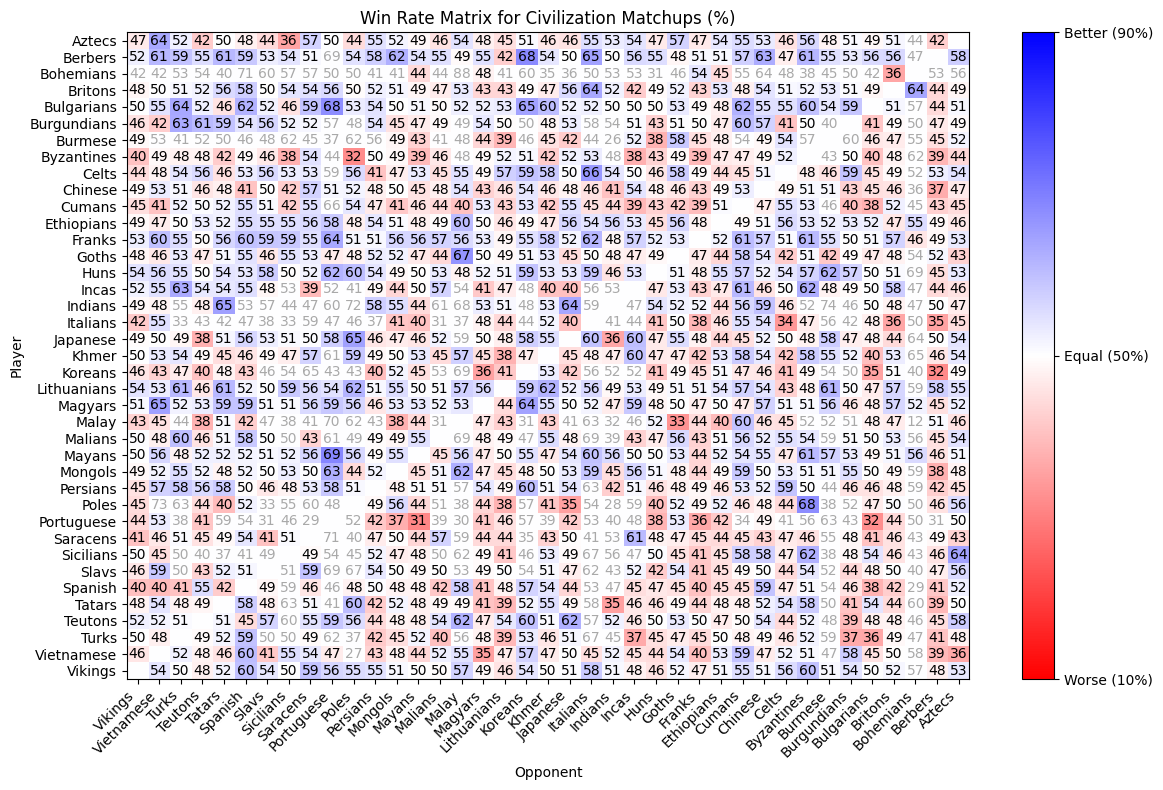

In [29]:
# Civilization matchup matrix

data_x = data["p1_civ"]
data_y = data["p2_civ"]

data_win = data["winner"]

unique_civs = []

for x in data_x:
    if x not in unique_civs:
        unique_civs.append(x)

civ_play_count = np.zeros((len(unique_civs)))


for i, x in enumerate(data_x):
    civ_play_count[unique_civs.index(x)] += 1

for i, x in enumerate(data_y):
    civ_play_count[unique_civs.index(x)] += 1

# for i, x in enumerate(unique_civs):
#     print(str(x)  + " - " + str(civ_play_count[i]))

unique_civs = sorted(unique_civs)
civ_count = len(unique_civs)
heat_grid = np.zeros((civ_count, civ_count))
tally_grid = np.zeros((civ_count, civ_count))

for i, x in enumerate(data_x):
    civ_index = unique_civs.index(x)
    opp_index = unique_civs.index(data_y[i])
    win = data_win[i] == 0
    heat_grid[civ_index][civ_count - opp_index - 1] += (1 if win else 0) if (opp_index is not civ_index) else (0.5)
    heat_grid[opp_index][civ_count - civ_index - 1] += (0 if win else 1) if (opp_index is not civ_index) else (0.5)
    tally_grid[civ_index][civ_count - opp_index - 1] += 1
    tally_grid[opp_index][civ_count - civ_index - 1] += 1

value_min = np.min(heat_grid)
value_max = np.max(heat_grid)
value_greater = max(value_min, value_max)

heat_grid_weighted = np.divide(heat_grid, tally_grid)
heat_grid_filtered = np.copy(heat_grid_weighted)

min_datapoints = 50
for x in range(civ_count):
    for y in range(civ_count):
        if tally_grid[x, y] < min_datapoints:
            heat_grid_filtered[x, y] = 0.5

plt.figure(figsize=(12, 8))
plt.xticks(np.arange(civ_count), labels=np.flip(unique_civs), rotation=45, ha='right')
plt.yticks(np.arange(civ_count), labels=unique_civs)
plt.xlabel("Opponent")
plt.ylabel("Player")
heatmap = plt.imshow(heat_grid_filtered, aspect="auto", cmap="bwr_r", clim=(0.1, 0.9)) # , clim=(-value_greater * 2, value_greater * 2)

plt.title("Win Rate Matrix for Civilization Matchups (%)")

# plt.tight_layout()

cbar = plt.colorbar(heatmap, ticks=[0.1, 0.5, 0.9]) 
cbar.ax.set_yticklabels(["Worse (10%)", "Equal (50%)", "Better (90%)"])  # vertically oriented colorbar

for i in range(civ_count):
    for j in range(civ_count):
        if i != civ_count - j - 1:
            value = heat_grid_weighted[i, j]
            # value_string = "{:.2f}".format(value)
            value_string = str(round(value * 100))
            if tally_grid[i, j] >= min_datapoints:
                plt.text(j, i, value_string,
                    ha="center", va="center", color="black")
            else:
                plt.text(j, i, value_string,
                    ha="center", va="center", color="darkgray")
                
plt.tight_layout()

plt.show()

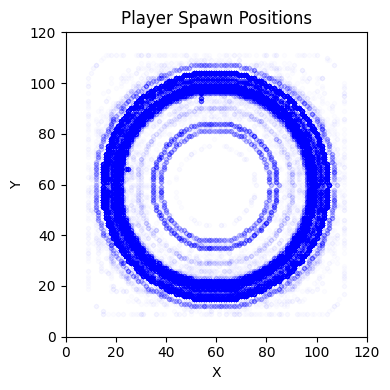

In [24]:
# Plain spawn position plot

map_width = 120

# Figure init
figure = plt.figure(figsize=(4, 4))
plt.title("Player Spawn Positions")
plt.xlim(0, map_width)
plt.ylim(0, map_width)
plt.xlabel("X")
plt.ylabel("Y")

# Plots
plot_p1 = plt.plot([], [], ".", alpha=0.01, color="blue", label="Win")
# plot_p2 = plt.plot([], [], ".", alpha=0.01, color="red", label="Loss")

data_p1 = overview
# data_p1 = overview.loc[overview["winner"] == 0]
# data_p2 = overview.loc[overview["winner"] == 1]

plot_p1[0].set_xdata(data_p1["p1_xpos"])
plot_p1[0].set_ydata(data_p1["p1_ypos"])
# plot_p2[0].set_xdata(data_p2["p1_xpos"])
# plot_p2[0].set_ydata(data_p2["p1_ypos"])
	
plt.tight_layout()
plt.show()

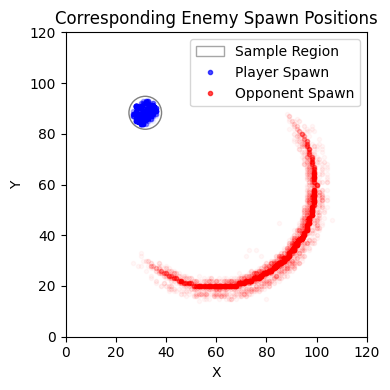

In [28]:
# Enemy town center spawn NON INTERACTIVE

map_width = 120

# Interactive parameters
current_angle = math.pi * 1.75
current_radius = 5
current_distance = 40

# Figure init
figure = plt.figure(figsize=(4, 4))
plt.title("Corresponding Enemy Spawn Positions")
plt.xlim(0, map_width)
plt.ylim(0, map_width)
plt.xlabel("X")
plt.ylabel("Y")

# Circle
circle = mplp.Circle((0, 0), color="grey", fill=False, label="Sample Region")
figure.axes[0].add_patch(circle)

# Plots
plot_p1 = plt.plot([], [], ".", alpha=0.03, color="blue", label="Player Spawn")
plot_p2 = plt.plot([], [], ".", alpha=0.03, color="red", label="Opponent Spawn")

# Functional variables
data_filtered = []

# Main draw
def v4_draw(angle, radius, distance):
	global data_filtered
	position = (
		map_width / 2 + distance * math.sin(angle),
		map_width / 2 + distance * math.cos(angle)
	)
	circle.center = position
	circle.radius = radius * 1.3
	radius_squared = radius * radius
	data_filtered = overview.loc[
		(overview["p1_xpos"] - position[0]) * (overview["p1_xpos"] - position[0]) + 
		(overview["p1_ypos"] - position[1]) * (overview["p1_ypos"] - position[1]) < radius_squared
	]
	plot_p1[0].set_xdata(data_filtered["p1_xpos"])
	plot_p1[0].set_ydata(data_filtered["p1_ypos"])
	plot_p2[0].set_xdata(data_filtered["p2_xpos"])
	plot_p2[0].set_ydata(data_filtered["p2_ypos"])

# Draw with the global interactive vars
def v4_draw_with_globals():
	global current_angle
	global current_radius
	global current_distance
	v4_draw(current_angle, current_radius, current_distance)
 
v4_draw_with_globals()

legend = plt.legend(loc='upper right')
for handle in legend.legend_handles: 
	handle.set_alpha(0.7)
	
plt.tight_layout()
plt.show()

NameError: name 'widgets' is not defined

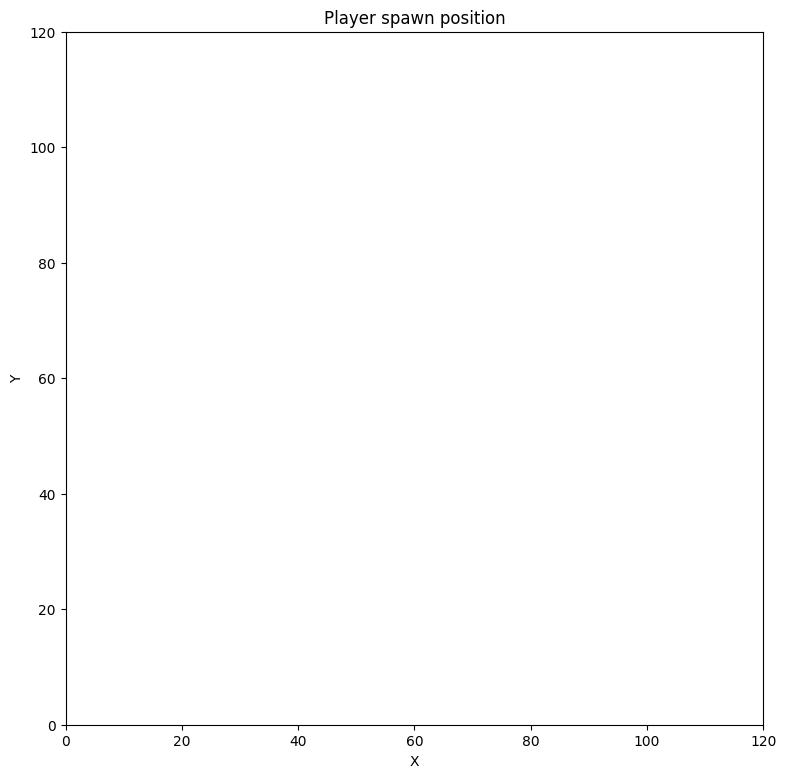

In [26]:
# Player town center spawn correlation

map_width = 120

# Interactive parameters
current_angle = 0
current_radius = 10
current_distance = 40

# Figure init
figure = plt.figure(figsize=(9, 9))
plt.title("Player spawn position")
plt.xlim(0, map_width)
plt.ylim(0, map_width)
plt.xlabel("X")
plt.ylabel("Y")

# Plots
plot_p1 = plt.plot([], [], "o", alpha=0.03, color="blue", label="Player Spawn")
plot_p2 = plt.plot([], [], "o", alpha=0.03, color="red", label="Opponent Spawn")

# For viewing individual games
plot_p1_town = plt.plot([], [], "o", markersize=10, alpha=1.0, color="blue")
plot_p2_town = plt.plot([], [], "o", markersize=10, alpha=1.0, color="red")
plot_p1_buildings = plt.plot([], [], "o", markersize=5, alpha=0.8, color="blue")
plot_p2_buildings = plt.plot([], [], "o", markersize=5, alpha=0.8, color="red")

# Widgets
widget_angle = widgets.FloatSlider(description="Angle", value=current_angle, min=0.0, max=math.pi * 2)
widget_radius = widgets.FloatSlider(description="Radius", value=current_radius, min=0.0, max=40)
widget_distance = widgets.FloatSlider(description="Distance", value=current_distance, min=0.0, max=map_width / 2)

# Functional variables
data_filtered = []
matchIDs = []
gameSelected = False
selectorRef = None

# When selecting a game via widget
def select_game(index, x, y, selector):
	#print("select")
	global matchIDs
	global selectorRef
	global gameSelected
	global data_filtered
	selectorRef = selector
	inputData = pd.read_csv(filepath_inputs + str(matchIDs.iloc[index]) + "_inputs.csv")
	input_filtered_p1 = inputData.loc[(inputData["type"] == "Build") & (inputData["player"]=="p1")]
	input_filtered_p2 = inputData.loc[(inputData["type"] == "Build") & (inputData["player"]=="p2")]
	selector.annotation.set_text(	"Game: " + str(matchIDs.iloc[index]) + "\n" +
									"Player 1 buildings: " + str(len(np.array(input_filtered_p1))) + "\n" +
									"Player 2 buildings: " + str(len(np.array(input_filtered_p2))))
	plot_p1_town[0].set_xdata([data_filtered["p1_xpos"].iloc[index]])
	plot_p1_town[0].set_ydata([data_filtered["p1_ypos"].iloc[index]])
	plot_p2_town[0].set_xdata([data_filtered["p2_xpos"].iloc[index]])
	plot_p2_town[0].set_ydata([data_filtered["p2_ypos"].iloc[index]])
	plot_p1_buildings[0].set_xdata(input_filtered_p1["x_pos"])
	plot_p1_buildings[0].set_ydata(input_filtered_p1["y_pos"])
	plot_p2_buildings[0].set_xdata(input_filtered_p2["x_pos"])
	plot_p2_buildings[0].set_ydata(input_filtered_p2["y_pos"])
	gameSelected = True
	# Update (hide) the other plots
	v4_draw_with_globals()

# When deselcting by clicking anywhere
def deselect_game(event):
	#print("deselect")
	global selectorRef
	global gameSelected
	if not gameSelected:
		plot_p1_buildings[0].set_xdata([])
		plot_p1_buildings[0].set_ydata([])
		plot_p2_buildings[0].set_xdata([])
		plot_p2_buildings[0].set_ydata([])
		plot_p1_town[0].set_xdata([])
		plot_p1_town[0].set_ydata([])
		plot_p2_town[0].set_xdata([])
		plot_p2_town[0].set_ydata([])
		if (selectorRef != None):
			selectorRef.annotation.set_text("")
		v4_draw_with_globals()
	gameSelected = False

# Main draw
def v4_draw(angle, radius, distance):
	global data_filtered
	global gameSelected
	global matchIDs
	position = (
		map_width / 2 + distance * math.sin(angle),
		map_width / 2 + distance * math.cos(angle)
	)
	radius_squared = radius * radius
	data_filtered = overview.loc[
		(overview["p1_xpos"] - position[0]) * (overview["p1_xpos"] - position[0]) + 
		(overview["p1_ypos"] - position[1]) * (overview["p1_ypos"] - position[1]) < radius_squared
	]
	matchIDs = data_filtered["match_id"]
	if gameSelected:
		plot_p1[0].set_xdata([])
		plot_p1[0].set_ydata([])
		plot_p2[0].set_xdata([])
		plot_p2[0].set_ydata([])
	else:
		plot_p1[0].set_xdata(data_filtered["p1_xpos"])
		plot_p1[0].set_ydata(data_filtered["p1_ypos"])
		plot_p2[0].set_xdata(data_filtered["p2_xpos"])
		plot_p2[0].set_ydata(data_filtered["p2_ypos"])

# Draw with the global interactive vars
def v4_draw_with_globals():
	global current_angle
	global current_radius
	global current_distance
	v4_draw(current_angle, current_radius, current_distance)

def v4_listener_angle(change):
	deselect_game(0)
	global current_angle
	current_angle = change.new
	v4_draw_with_globals()

def v4_listener_radius(change):
	deselect_game(0)
	global current_radius
	current_radius = change.new
	v4_draw_with_globals()

def v4_listener_distance(change):
	deselect_game(0)
	global current_distance
	current_distance = change.new
	v4_draw_with_globals()

v4_draw_with_globals()

legend = plt.legend(loc='upper right')
for handle in legend.legend_handles: 
	handle.set_alpha(0.7)

widget_angle.observe(v4_listener_angle, names='value')
widget_radius.observe(v4_listener_radius, names='value')
widget_distance.observe(v4_listener_distance, names='value')
widget_bar = widgets.HBox(children=[widget_angle, widget_distance, widget_radius])

# Add cursor listener
cursors = mplc.cursor(plot_p1)
figure.canvas.mpl_connect("button_press_event", deselect_game)
cursors.connect("add", lambda sel:select_game(sel.index, sel.target[0], sel.target[1], sel))

display(widget_bar)

figure.canvas.toolbar_visible = False
figure.canvas.header_visible = False
figure.canvas.footer_visible = False
	
plt.tight_layout()
plt.show()